# **Pandemic Playtime**: Analyzing Twitch Viewership Trends During COVID-19.

## **Introduction:**

<p>The COVID-19 pandemic and subsequent lockdowns had a profound impact on various aspects of everyone's lives, including their entertainment choices. This project analyzes the behavioral change of people as they turn to online gaming and streaming in response to the pandemic's challenges. It also allows us the gain insight into the role of online entertainment platforms, like Twitch during a time like this.</p>

<p>We can do this by finding a correlation between the increase in COVID cases and hours watched/streamed on Twitch before and after the pandemic started. If we do find a direct correlation between the two, it would mean that people did rely more on these methods of entertainment during the pandemic. Furthermore, a deeper insight could be gathered into which genre of games and what type of people were the most affected.</p>

<p>The expected outcome based on own observations and common knowledge would point towards a greater use of these streaming platforms like Twitch right after the Pandemic lockdown was imposed. Since people are locked in their homes, restricted from any outdoor gatherings, parties, or sports, etc., a natural and expected outcome would be more reliance towards digital media as the only source of socialization and entertainment.</p>

## **Motivation:**

<p>Visualizing a relation between the pandemic and the popularity of Twitch viewership/streaming would clearly signify that this was indeed what people turned to, to socialize and communicate. Also, further analysis might be able to point out exactly how Twitch helped people fulfill this social requirement by giving us a hint about which type of game people liked to watch or stream as the pandemic struck. Lastly, using the most recent data would also let us know whether this requirement has now become a trend or has died out as people are back to their usual lives.</p>

### Key Questions:

1. **Social Catalyst:** Can we affirm that Twitch played a vital role in people's social lives during the pandemic?
2. **Game Preferences Unveiled:** What genres stole the spotlight in Twitch streams, reflecting the communal taste during these challenging times?
3. **Trend Check:** Looking at the latest data, are people still hooked on Twitch for the social vibe, or was it just a pandemic thing?

## **Methods:**

### Data Sources:

1. **Twitch Data**:

<p>A Kaggle Dataset of Top 200 Ranked observations for each month from the year 2016 to 2023. Games are ranked according to their watched hours. This data was taken from 'sullygnome.com' - a Twitch analytics and statistics site. It provides data that is crucial for the analysis like the Total watched and streamed hours, number of streamers, and viewers for all the top 200 games for each month. The time frame for this data includes the time before, during, and after the COVID-19 pandemic, thus letting us monitor its impact on Twitch viewership over its complete duration.</p>

Kaggle URL - https://www.kaggle.com/datasets/rankirsh/evolution-of-top-games-on-twitch/data  
Original URL - https://sullygnome.com/

2. **COVID-19 Data:**

<p>Also a well-maintained Kaggle dataset. The original roots of the data come from a reputed known for its research-focused, comprehensive, and up-to-date data about various global issues including the COVID-19 pandemic. It provides a huge dataset of 67 features, distributed over a range of 2 years on a per-day basis from 01-01-2020 to 05-03-2022, for all the countries As it covers the entirety of the duration of the pandemic, we can visualize exactly when it hit the hardest along with the total cases and the death toll.</p>  

Kaggle URL - https://www.kaggle.com/datasets/georgesaavedra/covid19-dataset  
Original URL - https://ourworldindata.org/covid-vaccinations

### **Data Pipeline:**

#### Getting the Dataset - 

<p>The data pipeline is coded completely in Python. It first downloads the datasets from the respective Kaggle URLs. It achieves this with the help of Kaggle Authentication, via the Kaggle API. The respective credentials for Kaggle are stored as secrets in the Git repository of the user. The Datasets are downloaded in the "Data" folder of the repo before being unzipped as CSV files. <p>

#### Pre-Processing and Cleaning - 

<p>Fortunately, both datasets are already in a very good shape, thus requiring little to no manipulations. We only made minor adjustments to our liking, such as the removal and renaming of certain unnecessary columns and the removal of Null values from the Twitch dataset.<p>

#### Saving the Dataset - 

<p>An SQL connection is then established using SQLAlchemy Engine, after which the CSV files are then read and saved into this database as .sqlite format into their respective tables.<p>

#### Testing - 

<p>Finally, the pipeline also runs a few tests so as to make sure that the data has been sucessfully saved and that it does not have any errors.<p>

## **Analysis:**

In [1]:
import os
import subprocess
import sqlite3
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from matplotlib.lines import Line2D
import warnings
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.0f}'.format
pd.reset_option('display.float_format')  #Set floats to default
warnings.filterwarnings('ignore')

In [2]:
current_dir = os.getcwd()
print("Current Working Directory is - "+current_dir)

Current Working Directory is - C:\Users\evils\Desktop\MADEData\MADE\made-template\project


In [3]:
# Run the Pipeline only if the 'data.sqlite' file does not already exit
sqlite_file_path = '../data/data.sqlite'

if not os.path.exists(sqlite_file_path):
    %run Pipeline.py
else:
    print("The 'data.sqlite' file already exists. Skipping the pipeline.")

authenticating with Kaggle
authenticating Successfully
Twitch Data Downloaded
covid data downloaded
Downloaded files: ['.gitkeep', 'owid-covid-data.csv', 'Twitch_game_data.csv', 'Twitch_global_data.csv']
Reading twitch data fromC:\Users\evils\Desktop\MADEData\MADE\made-template\project\..\data\Twitch_game_data.csv
Reading covid data fromC:\Users\evils\Desktop\MADEData\MADE\made-template\project\..\data\owid-covid-data.csv
Completed Reading Data
Established Connection with SQLite
Saved Data to SQLite Database
Data pipeline completed successfully!


In [4]:
# Connect to the SQLite database
db_path = '../data/data.sqlite'
conn = sqlite3.connect(db_path)

twitch_query = "SELECT * FROM twitch_data"
covid_query = "SELECT * FROM covid_data"

twitch = pd.read_sql_query(twitch_query, conn)
covidData = pd.read_sql_query(covid_query, conn)

conn.close()

### **First, lets look at the COVID-19 Dataset.**
We know for a fact that the pandemic originated from Wuhan, China on December 2019. ([Source: Wiki](https://en.wikipedia.org/wiki/COVID-19_pandemic))
Soon after, COVID-19 cases began to rise all over the world. We will plot a graph for the total number of new cases against time to visualize this growth over the timespan of 3 years.

In [5]:
covidData.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [6]:
covidData.shape

(166326, 67)

In [7]:
covidData["location"].unique().size

238

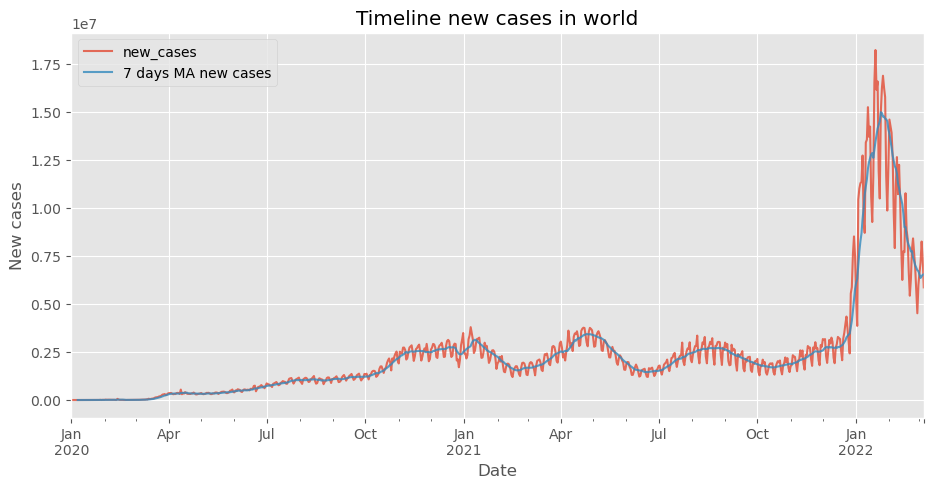

In [8]:
covid = covidData
covid.date = pd.to_datetime(covid['date'])
covid = covid.groupby('date').sum()
covid['7 days MA new cases'] = 0
covid['7 days MA new cases'] = covid['new_cases'].rolling(7).mean() #Moving average of new cases with window=10
covid['7 days MA new deaths'] = 0
covid['7 days MA new deaths'] = covid['new_deaths'].rolling(7).mean()  #Moving average of new deaths with window=10

covid[['new_cases', '7 days MA new cases']].plot(figsize = (11, 5), alpha = 0.8)
plt.title('Timeline new cases in world')
plt.xlabel('Date')
plt.ylabel('New cases')
plt.show()

We see that although cases start to rise from the beginning of 2020, there is not much growth until about halfway through the year. The reason for this even though a lot of people were infected, the testing for the disease started only until quite later down the year. Thus, due to lack of proper testing, the cases were not officially registered this early.

So let us now plot the the new deaths registered against the same time-frame. This will give us an idea of when the Pandemic actually started to take its effect.

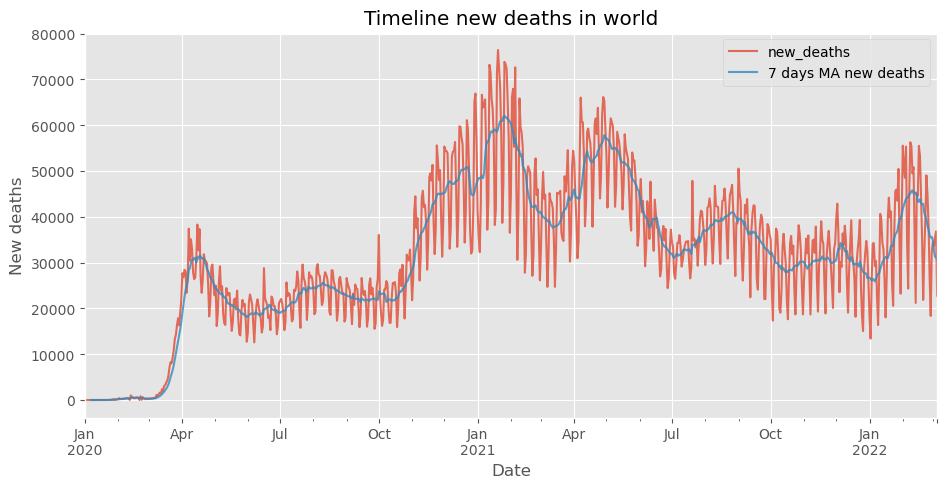

In [9]:
covid[['new_deaths', '7 days MA new deaths']].plot(figsize = (11, 5), alpha = 0.8)
plt.title('Timeline new deaths in world')
plt.xlabel('Date')
plt.ylabel('New deaths')
plt.show()

<p> Now we see that the effects of the Pandemic actually started much earlier than what we saw before. We see that the death toll started to rise in the first quarter of the year 2020. This marks the time when the lockdowns began in full force and people were restricted to their homes.</p> 

"By April 2020, about half of the world's population was under some form of lockdown" - 
[Source: Wiki](https://en.wikipedia.org/wiki/COVID-19_pandemic)

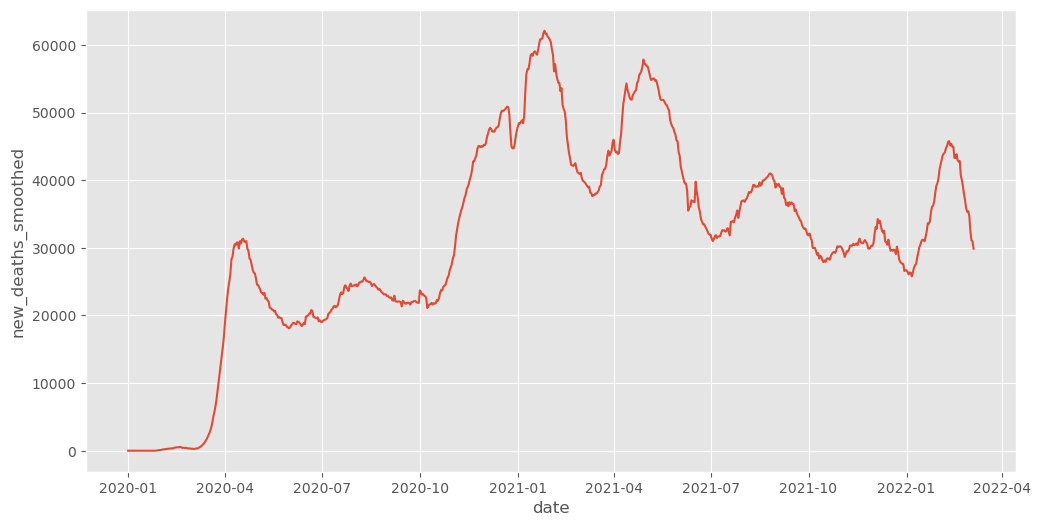

In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=covid, x='date',y='new_deaths_smoothed',markers='o', dashes=False, palette='Set1')
plt.show()

Using the smoothed feature variant of the new deaths for the same time-frame, we get a much clearer picture.

## **Now, lets look at the Twitch Dataset.**

In [11]:
twitch.head()

,Rank,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio\r
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740,1549,14.03


In [12]:
twitch.shape

(18600, 12)

In [13]:
twitch.nunique().head(4)

Rank      200
Game     2149
Month      12
Year        8
dtype: int64

The Dataset contains 200 ranks for 2149 Unique gamees over the course of 8 years

In [14]:
twitch.dtypes

Rank                    int64
Game                   object
Month                   int64
Year                    int64
Hours_watched           int64
Hours_streamed          int64
Peak_viewers            int64
Peak_channels           int64
Streamers               int64
Avg_viewers             int64
Avg_channels            int64
Avg_viewer_ratio\r    float64
dtype: object

In [15]:
twitch.columns

Index(['Rank', 'Game', 'Month', 'Year', 'Hours_watched', 'Hours_streamed', 'Peak_viewers', 'Peak_channels', 'Streamers', 'Avg_viewers', 'Avg_channels', 'Avg_viewer_ratio\r'], dtype='object')

In [16]:
#twitch.describe()

<p>Grouping up all the data month wise to help with visualization over the years.</p>

In [17]:
group = twitch.groupby(['Year','Month'])[['Hours_watched','Hours_streamed','Streamers','Avg_viewers','Avg_channels']].sum().reset_index()

group['Date'] = pd.to_datetime(group[['Year', 'Month']].assign(DAY=1))    #New column for the date-time format

group.set_index('Date', inplace=True)    #Setting date as the index

group.head(5)

,Year,Month,Hours_watched,Hours_streamed,Streamers,Avg_viewers,Avg_channels
Date,,,,,,,
2016-01-01,2016,1,440695158,11171973,1690892,593033,14948
2016-02-01,2016,2,415361414,10986670,1662437,597543,15709
2016-03-01,2016,3,464749316,11670473,1724196,625403,15615
2016-04-01,2016,4,441211782,11439143,1641525,613548,15810
2016-05-01,2016,5,426970292,11564643,1831310,574557,15477


<p>Now, we plot the monthly values of Hourly watched streams against the timeline.</p>

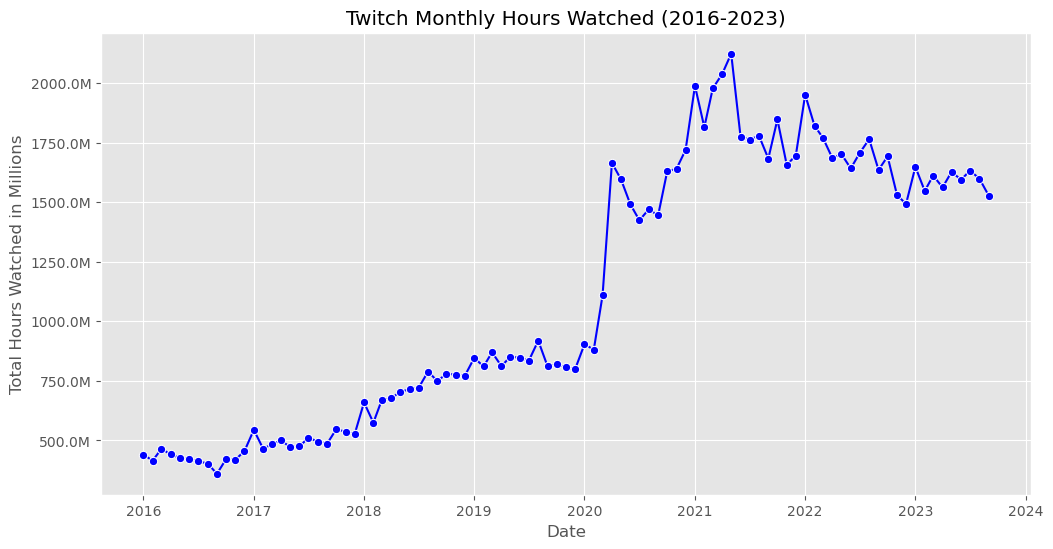

In [18]:
# Format Y-axis ticks in millions
def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'

plt.figure(figsize=(12, 6))
sns.lineplot(data=group, x=group.index, y='Hours_watched', marker='o', color='blue')

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter)) # Format Y-axis ticks in millions

plt.title('Twitch Monthly Hours Watched (2016-2023)')
plt.xlabel('Date')
plt.ylabel('Total Hours Watched in Millions')

plt.show()

<p>We see a spike in twitch viewership <strong>from 850 Million watched hours doubling to over 1500 Million in the beginnning of the year 2020 </strong>. This corrsoponds to the 1st Quarter of 2020. This observation corelates with our COVID-19 outbreak dates, with also, was around the 1st Quarter of the year 2020.</p>

<p>Now, lets see how the Streaming hours were affected in the same timeframe</p>

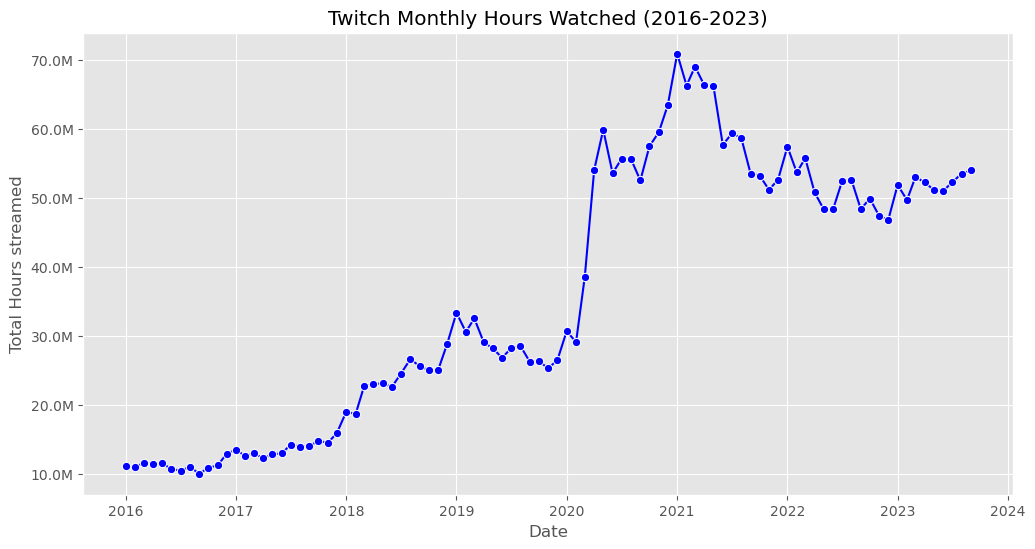

In [19]:
# Format Y-axis ticks in millions
def millions_formatter(x, pos):
    return f'{x / 1e6:.1f}M'

plt.figure(figsize=(12, 6))
sns.lineplot(data=group, x=group.index, y='Hours_streamed', marker='o', color='blue')
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter)) # Format Y-axis ticks in millions

plt.title('Twitch Monthly Hours Watched (2016-2023)')
plt.xlabel('Date')
plt.ylabel('Total Hours streamed')

plt.show()

<p>Here too, we see a similar trend. Spiking the Total streamed hours to over double its value in the first quarter of the year 2020</p>

<p>Now lets directly compare both the trends on the same graph</p>

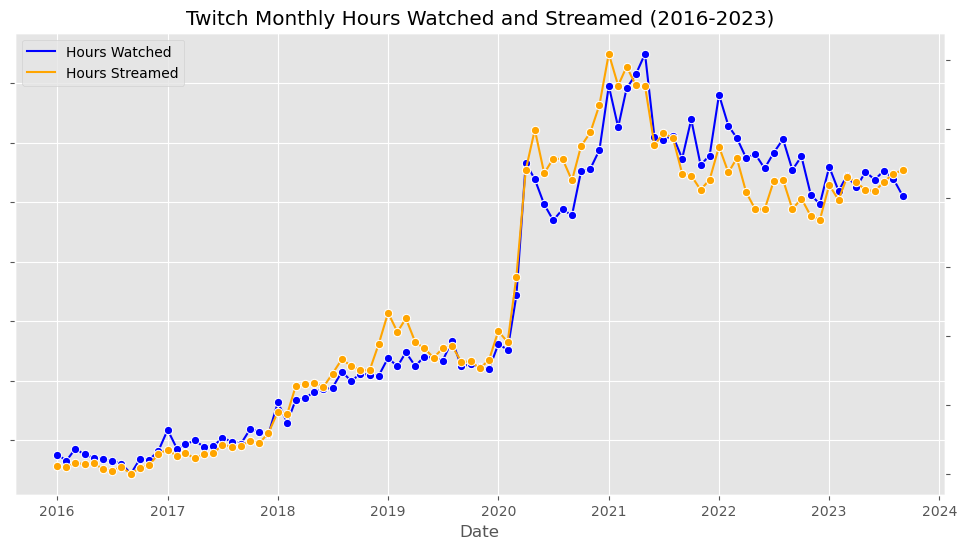

In [20]:
plt.figure(figsize=(12, 6))

# axes for 'Hours_watched'
ax1 = sns.lineplot(data=group, x=group.index, y='Hours_watched', marker='o', color='blue')

# axes for 'Hours_streamed'
ax2 = ax1.twinx()
sns.lineplot(data=group, x=group.index, y='Hours_streamed', marker='o', color='orange', ax=ax2)

plt.title('Twitch Monthly Hours Watched and Streamed (2016-2023)')
plt.xlabel('Date')
plt.ylabel('Total Hours')

# Removing Y-axis labels and ticks for both axes
ax1.yaxis.set_major_formatter(plt.NullFormatter())
ax1.set(yticklabels=[], ylabel=None)
ax2.yaxis.set_major_formatter(plt.NullFormatter())
ax2.set(yticklabels=[], ylabel=None)

# Hiding the extra gridlines
ax1.grid(True)
ax2.grid(False)

# Creating custom legends
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], color='blue', label='Hours Watched'),
                   Line2D([0], [0], color='orange', label='Hours Streamed')]

# Adding the legend into the plot
ax1.legend(handles=legend_elements, loc='upper left')

plt.show()


<p>Both the trends show a similar growth around the start of year 2020 and continue to grow over the next year before showing a slight decline to a somewhat stable trend towards the end of year 2023.

One key thing to notice here is the higher decline of the 'Hours Streamed' compared to 'Hours Watched' right before the curve starts to stablize between the years 2022 and 2023. This could convey the fact that a people who started streaming as a reaction to the Pandemic Lockdown conditions where now going back to their usual lifestyle after the Pandemic subsided </p>

<p>Lets further compare both the features - Total Streamed Hours and Total Watched Hours</p>

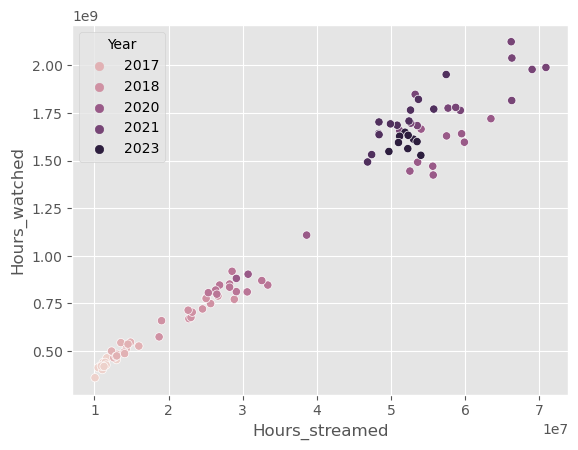

In [21]:
sns.scatterplot(data=group,x='Hours_streamed', y='Hours_watched', hue = 'Year')
plt.show()

<p>As expected, we see a clear correlation between the two features. The large gap in the middle suggests a sharp increase in values for both of the features between the year 2018 and 2020. Also, we see multiple dark dots for 2023 clustered together at a slightly lower value than the previous years, slight tilted towards hours watched, thus confirming our ovservations above.</p>

<p>Now, let's concretely answer the question of whether or not this rise in viewership stays after the initial spike, i.e., whether the twitch platform now has greater streamers and viewers compared to how it was before the outbreak</p>

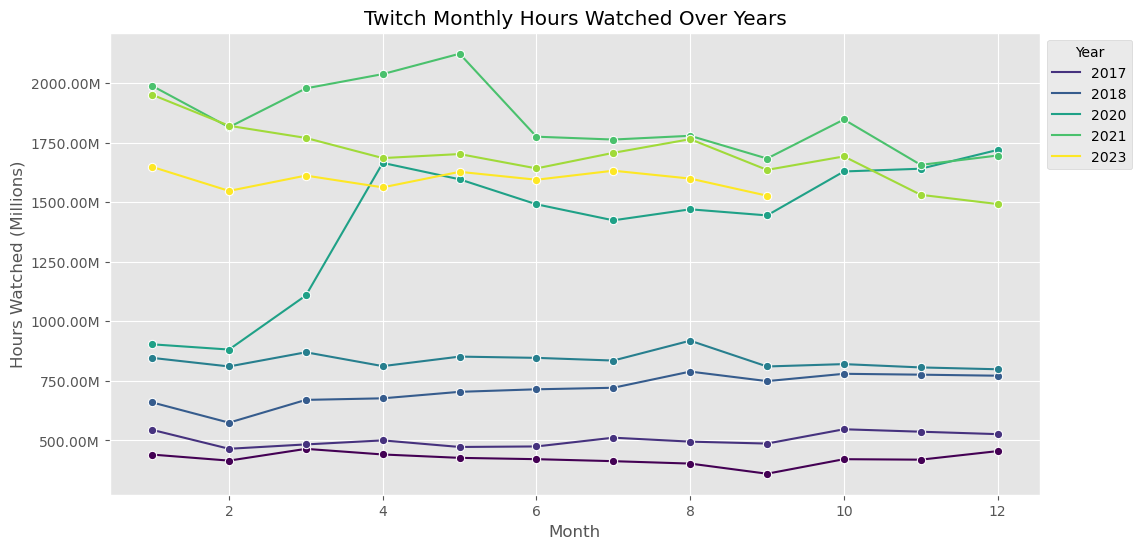

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

twitch['Date'] = pd.to_datetime(twitch[['Year', 'Month']].assign(DAY=1))

twitch.set_index('Date', inplace=True)     # Setting 'Date' as the index

monthly_data = twitch.groupby(['Year', 'Month'])['Hours_watched'].sum().reset_index()

def millions_formatter(value, _):           # Function to convert ticks in millions
    return '{:.2f}M'.format(value / 1e6)

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_data, x='Month', y='Hours_watched', hue='Year', marker='o', palette='viridis')

# Format Y-axis ticks in millions
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.title('Twitch Monthly Hours Watched Over Years')
plt.xlabel('Month')
plt.ylabel('Hours Watched (Millions)')
plt.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()


<p>The trends for years before 2020 clearly seperate themselves from the trends of years after 2020. This change is transitioned in 2020 (Dark Green Line) showing a sharp upward incline in the first quarter of the year. Overall, this indicates that Twitch viewership was substancially increased and with <strong>good retention even after the pandemic</strong> </p>

Finally, lets look into which time of streams or which video games got the most attention of the the viewers during this time of crisis.

For this purpose, we compare the individual trends of top 10 most watched games over the time frame of 8 years, which includes all the periods of before, during and after the pandemic. 

In [23]:
top_games_data = twitch.groupby('Game')['Hours_watched'].sum()

top_games_data = top_games_data.sort_values(ascending=False).head(10)

evolution_data = twitch.pivot_table(index='Game', columns='Year', values='Hours_watched', aggfunc='sum')

evolution_data = evolution_data.loc[top_games_data.index]

evolution_data = evolution_data.transpose()

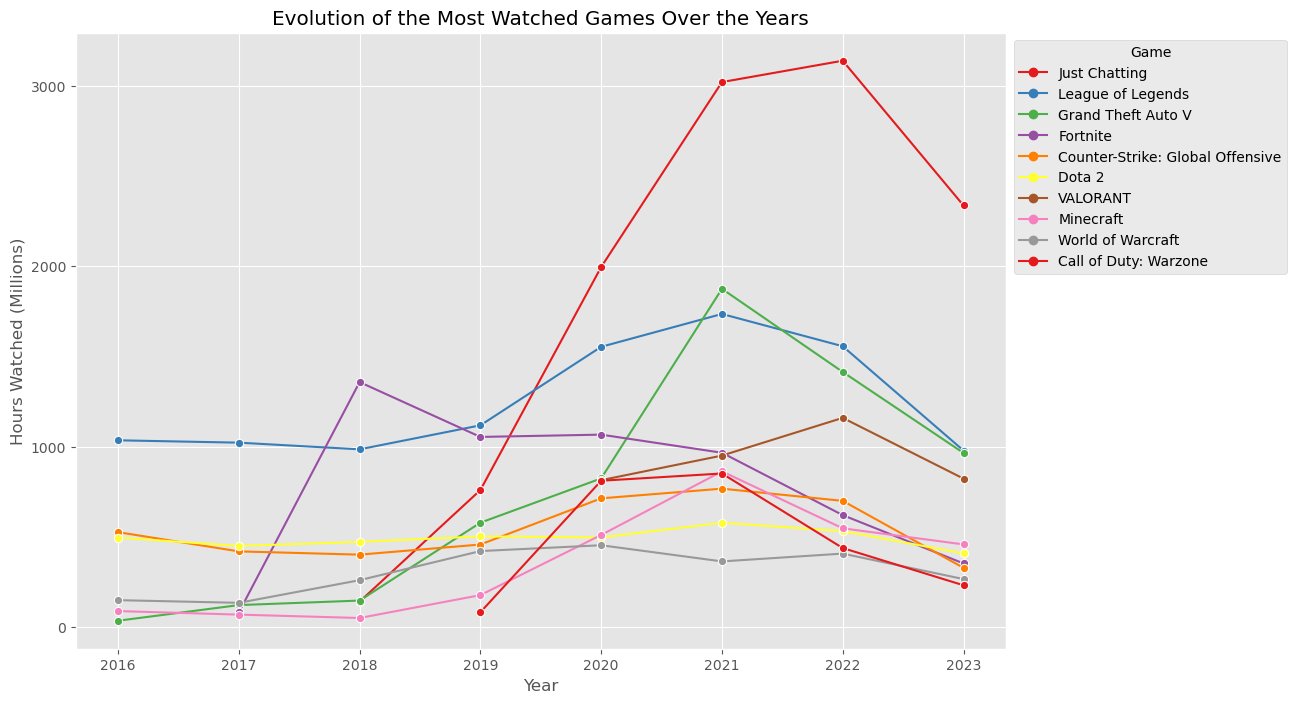

In [24]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=evolution_data, markers='o', dashes=False, palette='Set1')
plt.title('Evolution of the Most Watched Games Over the Years')
plt.xlabel('Year')
plt.ylabel('Hours Watched (Millions)')
plt.legend(title='Game', loc='upper right', bbox_to_anchor=(1.31, 1))

# Formatting the Y-axis labels to show the ticks in millions
plt.ticklabel_format(style='plain', axis='y', useOffset=False, scilimits=(6,6))
plt.yticks(np.arange(0, 4000000000, 1000000000), np.arange(0, 4000, 1000))

plt.show()


**“Just Chatting” saw a significant increase in hours watched around 2020 and peaked in 2022.** Which surprisingly enough, is not a video game but a catagory of streams with just a casual conversation between the streamer and other streamers or between the streamer and the viewers. 

Another interesting point to highlight here is about "GTA V" or Grand Theaft Auto V which gained popularity through a game-mode called "Role-playing". In this immersive mod, players assume the persona of a fictional character and live their lives within a virtual world. This serves as a compelling example of how individuals, in their pursuit of social interaction during lockdowns, heavily turned to digital media and video games to satisfy their social needs.

***"There has been an increasingly positive Twitch viewership trend in GTARP since late 2020, during the meat of the Covid-19 lockdown."***  - [Gamesight](https://blog.gamesight.io/the-metamorphosis-of-gta-v-on-twitch/)

Let's find out which games were ranked no.1 most of the time, and compare them.

In [25]:
df_rank1 = twitch[twitch['Rank'] == 1]
df_rank1.head()

,Rank,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio\r
Date,,,,,,,,,,,,
2016-01-01,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29
2016-02-01,1,League of Legends,2,2016,93154772,1266715,475784,2712,117996,134035,1822,73.54
2016-03-01,1,League of Legends,3,2016,94514511,1264029,599114,2585,117734,127206,1701,74.77
2016-04-01,1,League of Legends,4,2016,88389049,1217250,553165,2945,113251,122933,1692,72.61
2016-05-01,1,League of Legends,5,2016,80679320,1196096,433005,2635,118593,108585,1609,67.45


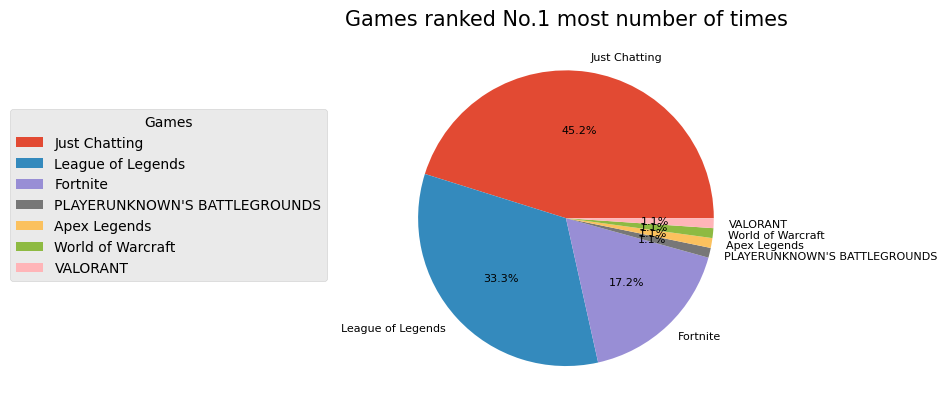

In [26]:
df_rank1['Game'].value_counts().plot(kind='pie', autopct='%1.1f%%',fontsize=8)
plt.title("Games ranked No.1 most number of times", fontsize=15, loc='center')
plt.ylabel('')
plt.legend(title="Games", bbox_to_anchor=(0.15,0.35), loc="lower right", fontsize=10,
           bbox_transform=plt.gcf().transFigure)
plt.show()

Not only did 'Just Chatting' surpass 'League of Legends' as the most-watched stream on Twitch, but it has **consistently maintained this position every month since the onset of the COVID-19 pandemic.** It has evolved into a significant aspect of the Twitch platform and remains the most-watched stream to date.

## **Conclusion:**

The COVID-19 pandemic's impact on Twitch viewership offers fascinating insights into how online entertainment and social interaction have changed. Early in 2020 and peaking in mid-2021, **Twitch usage saw a sharp increase** that was indicative of a change in how individuals looked for entertainment and connection during the lockdown period.  

The **stabilizing of Twitch's Hours Watched around 2022, along with a small fall in Hours Streamed**, is an interesting finding. This points to a **possible return to normalcy**, as a significant number of streamers appear to have resumed their everyday outdoor lives as before the outbreak.

Examining particular game genres, the research revealed a shift in preferences. Before the pandemic, "League of Legends" was the most popular stream on Twitch, but the rise of **"Just Chatting" as the most-watched stream after COVID-19** highlighted a significant change. **The growth of this category is evidence of the deep socialization needs that compelled people to use digital platforms.**

At the same time, the pandemic contributed to a **sharp rise in the popularity of GTA V roleplaying, indicating a clear shift toward real and lifelike digital experiences as a means of satisfying innate social cravings**. These changes, which go beyond statistical patterns, highlight a basic shift in psychological behavior and indicate a natural desire for socialization that is independent of physical limitations.

Finally, The rise in Twitch streaming online **wasn't just a short-term trend triggered by the pandemic**. Rather, as the steady graph shows, it has **solidified into a long-lasting trend**. Overall, this change in preferences for gaming and streaming represents a **significant and long-lasting shift in how individuals look for amusement and connection in society**, with websites like Twitch becoming essential to their everyday lives.